In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df_train = pd.read_csv('E:\\CAPSTONE DATA SCIENCE PROJECTS\\KAGGLE DATA SET\\1\\train.csv')
df_train.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df_test = pd.read_csv('E:\\CAPSTONE DATA SCIENCE PROJECTS\\KAGGLE DATA SET\\1\\test.csv')
df_test.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


# 2 Exploratery Data Analysis and Visualization 

In [6]:
df_train['Type'].unique()

array(['L', 'M', 'H'], dtype=object)

In [7]:
df_train['Machine failure'].unique()

array([0, 1], dtype=int64)

In [8]:
df_train.corr()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
id,1.000000,-0.005338,-0.002396,0.004419,-0.001968,-0.001790,0.001500,-0.000475,-0.000680,0.003275,0.002114,0.000175
Air temperature [K],-0.005338,1.000000,0.856080,0.016545,-0.006773,0.016994,0.067744,0.003826,0.100454,0.007967,0.007842,0.004815
Process temperature [K],-0.002396,0.856080,1.000000,0.011263,-0.006298,0.012777,0.030966,0.004459,0.041454,0.003871,0.005337,0.004399
Rotational speed [rpm],0.004419,0.016545,0.011263,1.000000,-0.779394,0.003983,-0.060868,-0.005765,-0.081996,0.053948,-0.061376,-0.003410
Torque [Nm],-0.001968,-0.006773,-0.006298,-0.779394,1.000000,-0.003148,0.145793,0.012983,0.100773,0.050289,0.108765,0.007986
Tool wear [min],-0.001790,0.016994,0.012777,0.003983,-0.003148,1.000000,0.056448,0.046470,0.011709,0.007624,0.063604,-0.002071
Machine failure,0.001500,0.067744,0.030966,-0.060868,0.145793,0.056448,1.000000,0.311919,0.564507,0.383941,0.494668,0.001428
TWF,-0.000475,0.003826,0.004459,-0.005765,0.012983,0.046470,0.311919,1.000000,0.010145,0.039927,0.036041,0.002044
HDF,-0.000680,0.100454,0.041454,-0.081996,0.100773,0.011709,0.564507,0.010145,1.000000,0.046680,0.067149,0.000885
PWF,0.003275,0.007967,0.003871,0.053948,0.050289,0.007624,0.383941,0.039927,0.046680,1.000000,0.090016,0.000827


# 3 Data preprocessing

# 3-1 EDA (exploratory data analysis) 

In [9]:
df_train.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Droping unimportant variable

In [10]:
df_train.drop("id",axis=1,inplace=True)
df_train.drop("Product ID",axis=1,inplace=True)
df_train


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
136424,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


# check list how many missing variables present 

In [11]:
df_train.duplicated().count()

136429

In [12]:
df_train.drop_duplicates()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
136424,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [13]:
# no duplicate present  

# Any Missing Value Present Check 

In [14]:
df_train.isnull().sum()    # no missing value 

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [15]:
# checking for outliars for each column 

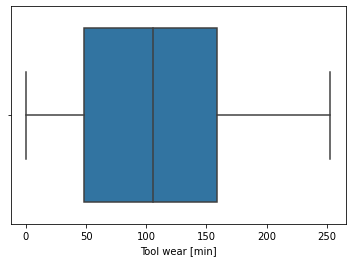

In [16]:
sns.boxplot(x=df_train["Tool wear [min]"])   # no outliar in the column
plt.show()

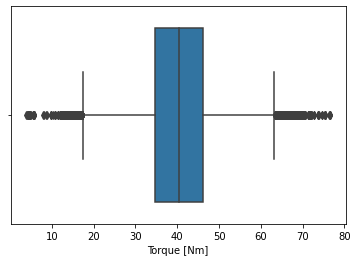

In [17]:
sns.boxplot(x=df_train["Torque [Nm]"])    # here we can see outliars but now not treat .here it balance outliars both side
plt.show()                                 # no impact on data set dont treat outliars 


# DATA WRANGLINGS
# Pratek column check karacha normal distribvuted ahe ki nahi .nasel tar tyala normal distributed banvacha  

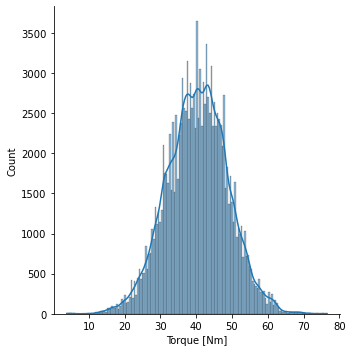

In [18]:
sns.displot(df_train["Torque [Nm]"],kde=True) # torque wala column  norminal distibuted ahe .
plt.show()

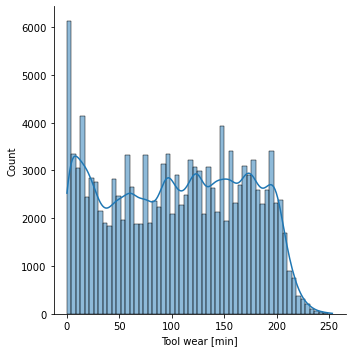

In [19]:
sns.displot(df_train["Tool wear [min]"],kde=True) # ha norminal distributed nahi ahe .mag kai karacha
# Tool wear column ha decrete variable ahe yachat skwenss cha concxept nahi yet .###ALERT###
# skwness fakta continous variable madhe use hoto .
plt.show()

In [20]:
df_train = pd.get_dummies(df_train,drop_first=True)

In [21]:
df_train 

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,1,0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,1
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,1,0
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,1,0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,300.1,311.4,1530,37.5,210,0,0,0,0,0,0,0,1
136425,297.5,308.5,1447,49.1,2,0,0,0,0,0,0,0,0
136426,300.5,311.8,1524,38.5,214,0,0,0,0,0,0,1,0
136427,301.7,310.9,1447,46.3,42,0,0,0,0,0,0,1,0


In [22]:
x = df_train.drop("Machine failure",axis=1)
y = df_train['Machine failure']

In [23]:
x

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,1,0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,1
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,1,0
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,1,0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
136424,300.1,311.4,1530,37.5,210,0,0,0,0,0,0,1
136425,297.5,308.5,1447,49.1,2,0,0,0,0,0,0,0
136426,300.5,311.8,1524,38.5,214,0,0,0,0,0,1,0
136427,301.7,310.9,1447,46.3,42,0,0,0,0,0,1,0


In [24]:
y

0         0
1         0
2         0
3         0
4         0
         ..
136424    0
136425    0
136426    0
136427    0
136428    0
Name: Machine failure, Length: 136429, dtype: int64

In [25]:
# Train & Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=9)

In [26]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Modelling Logistic Regression (Baseline Model)

In [27]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [28]:
# Prediction
ypred_train= log_model.predict(x_train)
ypred_test =log_model.predict (x_test)

In [29]:
# Evalution
from sklearn.metrics import accuracy_score
print("train accuracy",accuracy_score(y_train,ypred_train))
print("test accuracy",accuracy_score(y_test,ypred_test))

train accuracy 0.9959777539558194
test accuracy 0.9969214982042073


In [30]:
# Cross Validation
from sklearn.model_selection import cross_val_score  # cv score
scores = cross_val_score(log_model,x,y,cv=5)
print(scores)
scores.mean()

[0.99530895 0.99604193 0.98680642 0.99508906 0.99497893]


0.993645055918245

# Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[26849,     2],
       [   82,   353]], dtype=int64)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26851
           1       0.99      0.81      0.89       435

    accuracy                           1.00     27286
   macro avg       1.00      0.91      0.95     27286
weighted avg       1.00      1.00      1.00     27286



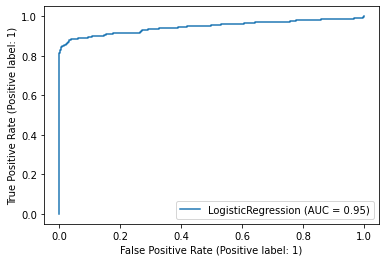

In [33]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_model,x_test,y_test)
plt.show()

In [34]:
# Here no hyperparameter tunning it is a base model of classification.
# AUC HIGH MEANS BETTER THE MODEL


# 2) KNN MODEL 

# KNN MODEL with deafault parameter 

In [35]:
# Default Modelling
# from sklearn.neighbors import KNeighborsClassifier
# knn_model= KNeighborsClassifier()
# knn_model.fit(x_train,y_train)

# 3) SVM ( Support Vector Machines)

In [36]:
# with default parameters

In [37]:
# Modelling
# from sklearn.svm import SVC
#svm_model = SVC()
# svm_model.fit(x_train,y_train)

In [38]:
# prediction
#ypred_train= svm_model.predict(x_train)
#ypred_test = svm_model.predict (x_test)

In [39]:
# accuracy 
# Evalution
#from sklearn.metrics import accuracy_score
#print("train accuracy",accuracy_score(y_train,ypred_train))
#print("test accuracy",accuracy_score(y_test,ypred_test))

In [40]:
# importances = svm_model.feature_importances_   # svm madhe feature importance wala function nahi ahe fakt decision tree
                                                 # madhe ahe .trees madhe use honar 

# SVM Model With Hyperparameter Tunning

In [41]:
#from sklearn.model_selection import GridSearchCV

#estimator = SVC()

#param_grid = {'C':[0.01,0.1],'kernel':['linear','rbf','sigmoid','poly']} # C mottha c pahije 

#grid = GridSearchCV(estimator,param_grid,cv=5)

#grid.fit(x_train,y_train)

# yacha hyper tunning la vel lagto karan data set motha ahe manun.cancel hyper para meter tunning .

In [42]:
# now we using Decision Trees 

# DECISION TREE

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
# prediction
ypred_train= dt_model.predict(x_train)
ypred_test = dt_model.predict (x_test)

In [45]:
# accuracy 
# Evalution
from sklearn.metrics import accuracy_score
print("train accuracy",accuracy_score(y_train,ypred_train))
print("test accuracy",accuracy_score(y_test,ypred_test))

train accuracy 0.9998259164582245
test accuracy 0.9918639595396906


In [46]:
# Cross Validation
from sklearn.model_selection import cross_val_score  # cv score
scores = cross_val_score(dt_model,x,y,cv=5)
print(scores)
scores.mean()

[0.99186396 0.99168072 0.9921205  0.99256029 0.99179036]


0.9920031649223852

In [47]:
dt_model.feature_importances_

array([0.03276628, 0.04371953, 0.0553921 , 0.05845878, 0.05233082,
       0.08338985, 0.31847519, 0.12404273, 0.22100358, 0.        ,
       0.00338412, 0.00703702])

In [48]:
pd.DataFrame(index=x.columns,data=dt_model.feature_importances_,columns=['Feature Importance' ])

,Feature Importance
Air temperature [K],0.032766
Process temperature [K],0.043720
Rotational speed [rpm],0.055392
Torque [Nm],0.058459
Tool wear [min],0.052331
TWF,0.083390
HDF,0.318475
PWF,0.124043
OSF,0.221004
RNF,0.000000


In [49]:
#   x = df_train.drop("RNF",axis=1)

# Decision Tree Hperparameter  

In [50]:
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeClassifier(random_state=9)

param_grid = {'criterion': ["gini", "entropy"],
              'max_depth':[1,2,3,4,5]} 

grid = GridSearchCV(estimator,param_grid,cv=5)

grid.fit(x_train,y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 4}

# Final Decision Tress Model

In [51]:
x = df_train.drop("RNF",axis=1) # VARIABLE CH NAAV CHANGE KAR ALL PROBLEM SOLVE EASILY.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=9)    
bestdt_model = DecisionTreeClassifier(criterion = 'gini',max_depth = 3,random_state=9)
bestdt_model.fit(x_train,y_train)
ypred_train= bestdt_model.predict(x_train)
ypred_test = bestdt_model.predict (x_test)
print("train accuracy",accuracy_score(y_train,ypred_train))
print("test accuracy",accuracy_score(y_test,ypred_test))
scores = cross_val_score(bestdt_model,x,y,cv=5)
print(scores)
scores.mean()

train accuracy 1.0
test accuracy 1.0
[1. 1. 1. 1. 1.]


1.0

In [52]:
# Ha decision trees cha aatapryant cha sarvat best model ahe

# Random forest modelling with default parameter

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [54]:
ypred_train= rf_model.predict(x_train)
ypred_test = rf_model.predict (x_test)

In [55]:
# accuracy 
# Evalution
from sklearn.metrics import accuracy_score
print("train accuracy",accuracy_score(y_train,ypred_train))
print("test accuracy",accuracy_score(y_test,ypred_test))

train accuracy 1.0
test accuracy 1.0


In [56]:
# Cross Validation
from sklearn.model_selection import cross_val_score  # cv score
scores = cross_val_score(rf_model,x,y,cv=5)
print(scores)
scores.mean()

[1. 1. 1. 1. 1.]


1.0

In [57]:
rf_model.feature_importances_

array([3.65638487e-03, 1.29504843e-03, 8.71202478e-03, 1.72835008e-02,
       3.29718711e-03, 6.94468764e-01, 2.94669796e-02, 1.09776238e-01,
       4.28384046e-02, 8.89627879e-02, 1.61368016e-04, 8.13126303e-05])

In [58]:
pd.DataFrame(index=x.columns,data=rf_model.feature_importances_,columns=['Feature Importance' ])

,Feature Importance
Air temperature [K],0.003656
Process temperature [K],0.001295
Rotational speed [rpm],0.008712
Torque [Nm],0.017284
Tool wear [min],0.003297
Machine failure,0.694469
TWF,0.029467
HDF,0.109776
PWF,0.042838
OSF,0.088963


In [59]:
from sklearn.model_selection import GridSearchCV

estimator = RandomForestClassifier(random_state=9)

param_grid = {'n_estimators':list(range(1,20))}

grid = GridSearchCV(estimator,param_grid,cv=5)

grid.fit(x_train,y_train)

grid.best_params_

{'n_estimators': 1}

# Random forest model with best hyper parameter

In [60]:
x = df_train.drop(["RNF","Machine failure"],axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=9)  

In [61]:
bestrf_model = RandomForestClassifier( n_estimators=10,random_state=9)
bestrf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=9)

In [62]:
ypred_train= bestrf_model.predict(x_train)
ypred_test = bestrf_model.predict (x_test)

In [63]:
# accuracy 
# Evalution
print("train accuracy",accuracy_score(y_train,ypred_train))
print("test accuracy",accuracy_score(y_test,ypred_test))

train accuracy 0.9990562839577435
test accuracy 0.9968115517115004


In [64]:
scores = cross_val_score(bestrf_model,x,y,cv=5)
print(scores)
scores.mean()

[0.99618852 0.99629847 0.99607858 0.99604193 0.99505223]


0.9959319435038225

In [65]:
x

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Type_L,Type_M
0,300.6,309.6,1596,36.1,140,0,0,0,0,1,0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,1
2,299.3,308.5,1805,26.5,25,0,0,0,0,1,0
3,301.0,310.9,1524,44.3,197,0,0,0,0,1,0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
136424,300.1,311.4,1530,37.5,210,0,0,0,0,0,1
136425,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,300.5,311.8,1524,38.5,214,0,0,0,0,1,0
136427,301.7,310.9,1447,46.3,42,0,0,0,0,1,0


In [66]:
# yacaht nusta machine failure cha column yet ahe yala consider nahi karacha new project manun jupiter file ahe tyacht seprate
# random forest run kela ahe . kernal la old data dila mi aata barobar ans aala jar test accuracy 1 yet ahe kernal
# survatiche sale run kara . aata yala old data dyacha always


# Ada Boost

In [67]:
from sklearn.ensemble import AdaBoostClassifier
ab_model = AdaBoostClassifier()
ab_model.fit(x_train,y_train)

In [68]:
ypred_train= ab_model.predict(x_train)
ypred_test = ab_model.predict(x_test)

In [69]:
 #accuracy 
 #Evalution
from sklearn.metrics import accuracy_score
print("train accuracy",accuracy_score(y_train,ypred_train))
print("test accuracy",accuracy_score(y_test,ypred_test))

In [70]:
# Cross Validation
from sklearn.model_selection import cross_val_score  # cv score
scores = cross_val_score(ab_model,x,y,cv=5)
print(scores)
scores.mean()

# AdaBoost hyper parameters 

In [71]:
 from sklearn.model_selection import GridSearchCV

estimator = AdaBoostClassifier(random_state=9)

param_grid = {'n_estimators':list(range(1,11))}

grid = GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")

grid.fit(x_train,y_train)

grid.best_params_

In [72]:
ab_model.feature_importances_

In [73]:
pd.DataFrame(index=x.columns,data=ab_model.feature_importances_,columns=['Feature Importance'])

In [74]:
grid.best_estimator_.feature_importances_

In [75]:
feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                    # index=x.columns,
                    #columns=['importance'])

In [76]:
important_features = feats[feats['importance']>0.01]
important_features

In [77]:
important_features = feats[feats['importance']>0.01].index.to_list() # list madhe convert kela mi ,karan dataframe la list
                                                                     # lagate

# Adaboost with best hyperparameter

In [78]:
x_imp = x[important_features]
y = df_train['Machine failure']

In [79]:
x_imp 

In [80]:
y

In [81]:
# Train & Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=9)

In [82]:
bestab_model = AdaBoostClassifier(n_estimators=50)
bestab_model.fit(x_train,y_train)

In [83]:
ypred_train= bestrf_model.predict(x_train)
ypred_test = bestrf_model.predict (x_test)

In [84]:
# accuracy 
# Evalution
print("train accuracy",accuracy_score(y_train,ypred_train))
print("test accuracy",accuracy_score(y_test,ypred_test))

In [85]:
scores = cross_val_score(bestab_model,x,y,cv=5)
print(scores)
scores.mean()

# Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train,y_train)

In [ ]:
ypred_train= gb_model.predict(x_train)
ypred_test = gb_model.predict(x_test)

In [ ]:
# accuracy 
# Evalution
from sklearn.metrics import accuracy_score
print("train accuracy",accuracy_score(y_train,ypred_train))
print("test accuracy",accuracy_score(y_test,ypred_test))

In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score  # cv score
scores = cross_val_score(gb_model,x,y,cv=5)
print(scores)
scores.mean()

# Gradient Boost with best hyperparameter

In [ ]:
# Hyperparameter Tuning For Gradiant Boost Classifier
from sklearn.model_selection import GridSearchCV
#model
estimator = GradientBoostingClassifier()
# parameters $ values
param_grid = {"n_estimators":[1,100],
               "learning_rate":[0.1,0.3]}
# Identifying the best value of the parameter within given values for the given data
grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
grid.best_params_

In [ ]:
grid.best_estimator_.feature_importances_

In [ ]:
feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                     index=x.columns,
                    columns=['importance'])

In [ ]:
important_features = feats[feats['importance']>0.01]
important_features

In [86]:

important_features = feats[feats['importance']>0.01].index.to_list() 
important_features

# Gradient boost with best parameters 

In [ ]:
#x_imp = x[important_features]       # simple we drop unimportant parameters
#y = df_train['Machine failure']

In [ ]:
x_imp

In [87]:
y 

In [ ]:
bestgb_model = GradientBoostingClassifier()
bestgb_model.fit(x_train,y_train)

In [ ]:
ypred_train= bestgb_model.predict(x_train)
ypred_test = bestgb_model.predict(x_test)

In [ ]:
# accuracy 
# Evalution
from sklearn.metrics import accuracy_score
print("train accuracy",accuracy_score(y_train,ypred_train))
print("test accuracy",accuracy_score(y_test,ypred_test))

In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score  # cv score
scores = cross_val_score(bestgb_model,x,y,cv=5)
print(scores)
scores.mean()

# XG Boost

In [88]:
# pip install xgboost

# XG boost model with default parameters

In [ ]:
x = df_train.drop("Machine failure",axis=1)
y = df_train['Machine failure']

In [ ]:
x=np.array( df_train.drop("Machine failure",axis=1))  # x aapla data frame madhe hota aapla la array kiva list madhe
                                                      # x pahije hota CV SCORE SATHI

In [ ]:
x

In [ ]:
x.values.tolist() Data frame la list madhe convert karasathi.


In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)

In [ ]:
ypred_train= xgb_model.predict(x_train)
ypred_test = xgb_model.predict(x_test)

In [ ]:
# accuracy 
# Evalution
from sklearn.metrics import accuracy_score
print("train accuracy",accuracy_score(y_train,ypred_train))
print("test accuracy",accuracy_score(y_test,ypred_test))

In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score  # cv score
scores= cross_val_score(estimator = xgb_model, X=x , y=y , cv=5)
print("Cross Validation Score:",scores.mean())


In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score  # cv score
scores= cross_val_score(estimator = xgb_model, X=x , y=y , cv=5) # X ha aaplya la capital ch pahije.chota x ha variable ahe. 
print("Cross Validation Score:",scores.mean())


In [89]:
# Varaiable x cha purna explination new project madhe dila ahe . 

# XG Boost with Hperparameter

In [ ]:
# Hyperparameter Tuning For Gradiant Boost Classifier
from sklearn.model_selection import GridSearchCV
#model
estimator = XGBClassifier()
# parameters $ values
param_grid = {"n_estimators":[10,20,40,100],
               "max_depth":[3,4,5],
                "gamma":[0,0.15,0.3,0.5,1]}
# Identifying the best value of the parameter within given values for the given data
grid = GridSearchCV(xgb_model,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
grid.best_params_

In [ ]:
grid.best_estimator_.feature_importances_

In [ ]:
feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                     index=x.columns,
                    columns=['importance'])

In [ ]:
important_features = feats[feats['importance']>0.01]
important_features

In [90]:
important_features = feats[feats['importance']>0.01].index.to_list() 
important_features

# XGBoost with best parameters

In [ ]:
x = x[important_features]       # simple we drop unimportant parameters
y = df_train['Machine failure']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=9)

In [ ]:

xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)

In [99]:
# bestdt_model.predict([[df_test]])

# preprocessing


In [100]:
df_test = pd.read_csv('E:\\CAPSTONE DATA SCIENCE PROJECTS\\KAGGLE DATA SET\\1\\test.csv')
df_test.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [101]:
df_test.drop("id",axis=1,inplace=True)
df_test.drop("Product ID",axis=1,inplace=True)
df_test

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
90949,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


In [102]:
df_test = pd.get_dummies(df_test,drop_first=True)

In [103]:
df_test

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
0,302.3,311.5,1499,38.0,60,0,0,0,0,0,1,0
1,301.7,311.0,1713,28.8,17,0,0,0,0,0,1,0
2,301.3,310.4,1525,37.7,96,0,0,0,0,0,1,0
3,300.1,309.6,1479,47.6,5,0,0,0,0,0,0,1
4,303.4,312.3,1515,41.3,114,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
90949,302.3,311.4,1484,40.4,15,0,0,0,0,0,1,0
90950,297.9,309.8,1542,33.8,31,0,0,0,0,0,1,0
90951,295.6,306.2,1501,41.4,187,0,0,0,0,0,1,0
90952,298.1,307.8,1534,40.3,69,0,0,0,0,0,1,0


In [106]:
x = df_test

In [107]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_test = scaler.fit_transform(x_test)

In [110]:
yoyo=bestdt_model.predict(x)
yoyo

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [111]:
zoom = np.array(yoyo)

In [112]:
df = pd.DataFrame(zoom)

In [114]:
df.to_csv("sample_submission.csv")